#DUYGU TANIMA - KAGGLE VERİSETİ
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

---

[<img align="left" width="100" height="100" src="https://images.cdn2.stockunlimited.net/clipart/letter-a_1995332.jpg">](https://www.ayyucekizrak.com/)
[<img align="right" width="200" height="50"  src="https://raw.githubusercontent.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari/944a247d404741ba37b9ef74de0716acff6fd4f9/images/dltr_logo.png">](https://deeplearningturkiye.com/)

Drive Hesap Doğrulama

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [6]:
import os
os.chdir("/content/drive")
!pwd
!ls

/content/drive
'175542013-Leyla ALPTEKİN.docx'
 3.Sınıf_Bahar
 3.Sınıf_Güz
'Deep Learning'
'Deep Learning Proje'
 derin
 GameLab.docx
'İşyeri Eğitimi Dönem değişikliği Dilekçesi Leyla alptekin.pdf'
'mercedes omniplus uygulaması.desktop'
'OTOMOTİV KAMPI SERTİFİKA'
'SerkanAltunsaray İşyeri değişikliği dilekçesi.pdf'
 titanic
 titanic_veri.ipynb
 titanikVeriGorsellestirme.ipynb
 Udemy_DerinOgrenmeyeGiris
 Untitled0.ipynb
 VeriArtirma
'veri yapıları'
 YGA


In [7]:
!ls Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima

 data			   duygutanima_demo2.py      README.md
 DuyguTanima_Demo1.ipynb   DuyguTanima_Demo3.ipynb   utils
 duygutanima_demo1.py	  'Duygu Tanıma Demo.PNG'
 DuyguTanima_Demo2.ipynb   images


In [3]:
!ls drive/DLTR_COLAB/DuyguTanima

ls: cannot access 'drive/DLTR_COLAB/DuyguTanima': No such file or directory


**UYGULAMA BAŞLANGICI**

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

Bize verilen veriseti 35887 satır ve 3 kolondan oluşuyor

In [10]:
root ='/content/gdrive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Duygu_Tanima/'


In [11]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral - sinirli, iğrenmiş, korku, mutlu, üzgün, şaşkın, doğal
batch_size = 256
epochs = 5

In [12]:
with open(root + "data/fer2013/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

FileNotFoundError: ignored

In [ ]:
data.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [ ]:
data["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

Usage kolonunda verisetindeki örnekler kaç gruba ayrılmış. Kaggle da genelde bu şekilde submit sonrası asıl test edilmesi için verisetinden bir kısmını "PrivateTest" olarak ayırırlar.

**EĞİTİM DATASI - ÖN İŞLEME**

In [ ]:
np.unique(data["Usage"].values.ravel()) 

print('Eğitim verisetindeki örnek sayısı: %d'%(len(data[data.Usage == "Training"])))

Eğitim verisetindeki örnek sayısı: 28709


In [ ]:
train_data = data[data.Usage == "Training"] #sadece eğitim örneklerini train_data değişkenine aldık

In [ ]:
#eğitim örneklerinin piksel değerleri bize tablo halinde yan yana verildiği için boşluklardan parse ederek liste olarak değişkene aldık
train_pixels = train_data.pixels.str.split(" ").tolist() 

train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

print(train_images.shape)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


In [ ]:
#Resmi 48x48 px şeklinde göstermek için bir fonksiyon tanımlayalım
def show(img):
    show_image = img.reshape(48,48)
    
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

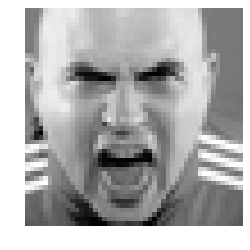

In [ ]:
#bir eğitim örneği gösterelim
show(train_images[22])

In [ ]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('Farklı yüz ifadelerinin sayısı: %d'%train_labels_count)

Farklı yüz ifadelerinin sayısı: 7


In [ ]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [ ]:
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)

print(y_train.shape)

(28709, 7)


TEST DATASI - ÖN İŞLEME

In [ ]:
np.unique(data["Usage"].values.ravel()) 

print('Test verisetindeki örnek sayısı: %d'%(len(data[data.Usage == "PublicTest"])))

Test verisetindeki örnek sayısı: 3589


In [ ]:
test_data = data[data.Usage == "PublicTest"] 
test_pixels = test_data.pixels.str.split(" ").tolist() 

test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)

print(test_images.shape)


(3589, 2304)


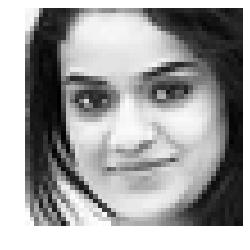

In [ ]:
#bir test örneği gösterelim
show(test_images[5])

In [ ]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)
y_test = y_test.astype(np.uint8)


print(y_test.shape)

(3589, 7)


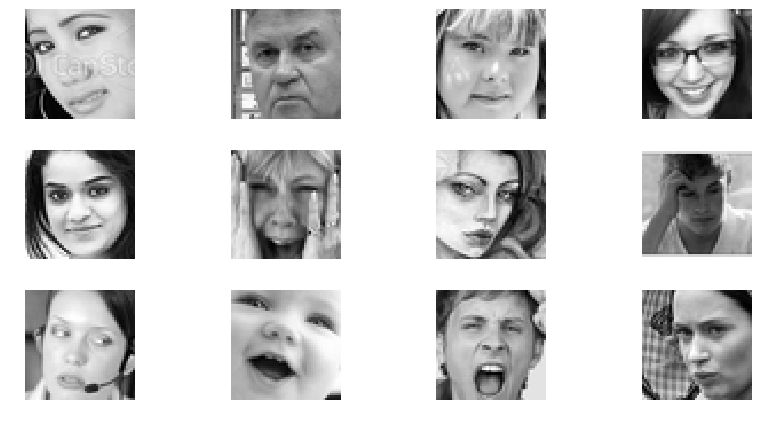

In [ ]:
#test verisetinden örneklerden bir kaçını toplu halde görelim

plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.axis('off')
    
    image = test_images[i].reshape(48,48)
    plt.imshow(image, cmap="gray")

plt.tight_layout()
plt.show()

Derin Öğrenme Modeli

In [ ]:
model = Sequential()

model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
__________

In [ ]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print("Train:", x_train.shape)
print("Test:", x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


In [ ]:
print("Train:", y_train.shape)
print("Test:", y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


In [ ]:
# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'data/face_model.h5', verbose=1, save_best_only=True)

epochs = 10
batchSize = 100 

# modeli çalıştır
hist = model.fit(x_train, y_train, 
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize, 
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], verbose=2)

# save model to json
model_json = model.to_json()
with open(root + "data/face_model.json", "w") as json_file:
    json_file.write(model_json)

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
 - 26s - loss: 1.3715 - acc: 0.4743 - val_loss: 1.3014 - val_acc: 0.4898

Epoch 00001: val_loss improved from inf to 1.30136, saving model to drive/DLTR_COLAB/DuyguTanima/data/face_model.h5
Epoch 2/10
 - 26s - loss: 1.3370 - acc: 0.4864 - val_loss: 1.2870 - val_acc: 0.5093

Epoch 00002: val_loss improved from 1.30136 to 1.28702, saving model to drive/DLTR_COLAB/DuyguTanima/data/face_model.h5
Epoch 3/10
 - 26s - loss: 1.3140 - acc: 0.4961 - val_loss: 1.2303 - val_acc: 0.5288

Epoch 00003: val_loss improved from 1.28702 to 1.23030, saving model to drive/DLTR_COLAB/DuyguTanima/data/face_model.h5
Epoch 4/10
 - 26s - loss: 1.2881 - acc: 0.5058 - val_loss: 1.2350 - val_acc: 0.5344

Epoch 00004: val_loss did not improve from 1.23030
Epoch 5/10
 - 26s - loss: 1.2691 - acc: 0.5136 - val_loss: 1.2050 - val_acc: 0.5358

Epoch 00005: val_loss improved from 1.23030 to 1.20496, saving model to drive/DLTR_COLAB/DuyguTanima/data/face_model.h5

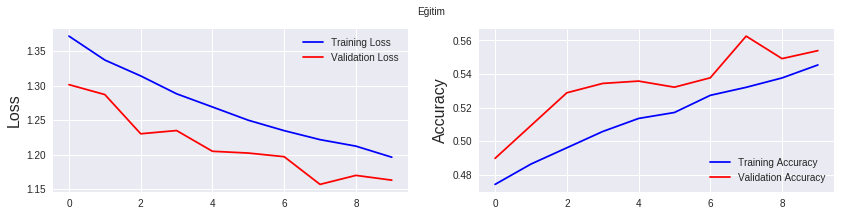

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Kaggle submit edecek gibi **PrivateTest** örnekleri ile test edelim

In [ ]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
test.head()

emotion                                             pixels
32298        0  [170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ...
32299        5  [7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ...
32300        6  [232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246...
32301        4  [200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111....
32302        2  [40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78....

In [ ]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [ ]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [ ]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest üzerinde doğruluk başarımı:", score)

PrivateTest üzerinde doğruluk başarımı: [1.159390372697209, 0.5564224017915304]


Kendi örneklerimiz ile test edelim

(48, 48, 1)

In [ ]:
x_test_private = test_images[5].reshape(-1, 48, 48, 1)

In [ ]:
import cv2

In [ ]:
!ls 'drive/DLTR_COLAB/DuyguTanima/images'

bb1.jpg      lotr1.png	_predicted_image.jpg  test4.jpg  test.jpg
bb2.jpg      lotr2.jpg	test2.jpg	      test5.jpg
hababam.jpg  lotr3.jpg	test3.jpg	      test6.jpg


In [ ]:
# en iyi ağırlıkları yükle
model.load_weights(root + 'data/face_model.h5')

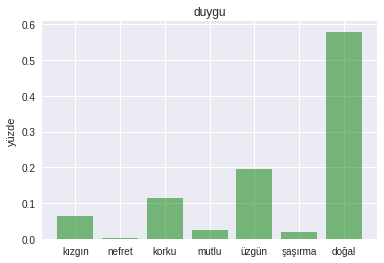

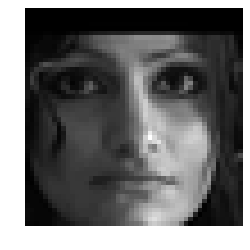

In [ ]:
test_image=x_test_private[15]

custom = model.predict(test_image.reshape(-1, 48, 48, 1))


#1
objects = ('kızgın', 'nefret', 'korku', 'mutlu', 'üzgün', 'şaşırma', 'doğal')
y_pos = np.arange(len(objects))
    
plt.bar(y_pos, custom[0], align='center', alpha=0.5, color='g')
plt.xticks(y_pos, objects)
plt.ylabel('yüzde')
plt.title('duygu')
plt.show()

#2
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.axis('off')
plt.gray()
plt.imshow(test_image.reshape(48,48))

plt.show()
#------------------------------

In [ ]:
custom

array([[0.06448399, 0.00337856, 0.11355548, 0.02580728, 0.19515865,
        0.01834167, 0.5792744 ]], dtype=float32)

In [ ]:
ind = 0.1+0.6*np.arange(len(objects))
ind

array([0.1, 0.7, 1.3, 1.9, 2.5, 3.1, 3.7])

In [ ]:
ind = 0.1+0.6*np.arange(len(objects)) 

width = 0.4   
color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']
for i in range(len(objects)):
    plt.bar(ind[i], custom[i], width, color=color_list[i])
plt.title("Classification results ",fontsize=20)
plt.xlabel(" Expression Category ",fontsize=16)
plt.ylabel(" Classification Score ",fontsize=16)
plt.xticks(ind, objects, rotation=45, fontsize=14)